![](https://cff2.earth.com/uploads/2019/07/14133553/An-increase-in-forest-fires-means-more-beetles-and-woodpeckers-730x410.jpg)

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [28]:
df=pd.read_csv("/Users/harshjhunjhunwala/desktop/cs/python/sentdex/data_analysis/brazil_fire/amazon.csv",encoding="ISO-8859-1")
df.drop(["date"],axis=1,inplace=True)
df.replace({"Janeiro":"January", "Fevereiro":"February", "Março":"March", "Abril":"April", "Maio":"May", "Junho":"June", "Julho":"July", "Agosto":"August", "Setembro":"September", "Outubro":"October", "Novembro":"November", "Dezembro":"December"}, inplace=True)
df

,year,state,month,number
0,1998,Acre,January,0.0
1,1999,Acre,January,0.0
2,2000,Acre,January,0.0
3,2001,Acre,January,0.0
4,2002,Acre,January,0.0
...,...,...,...,...
6449,2012,Tocantins,December,128.0
6450,2013,Tocantins,December,85.0
6451,2014,Tocantins,December,223.0
6452,2015,Tocantins,December,373.0


In [29]:
df.isnull().sum()

year      0
state     0
month     0
number    0
dtype: int64

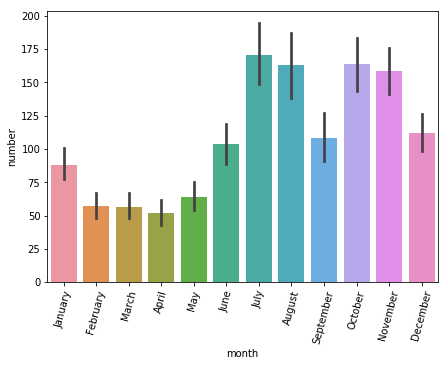

In [26]:
plt.figure(figsize=(7, 5))
# sns.barplot(x="month", y="number",data=df,
#            order=["May","June","July","August","September"])
sns.barplot(x="month", y="number",data=df)
plt.xticks(rotation=75)
plt.show()

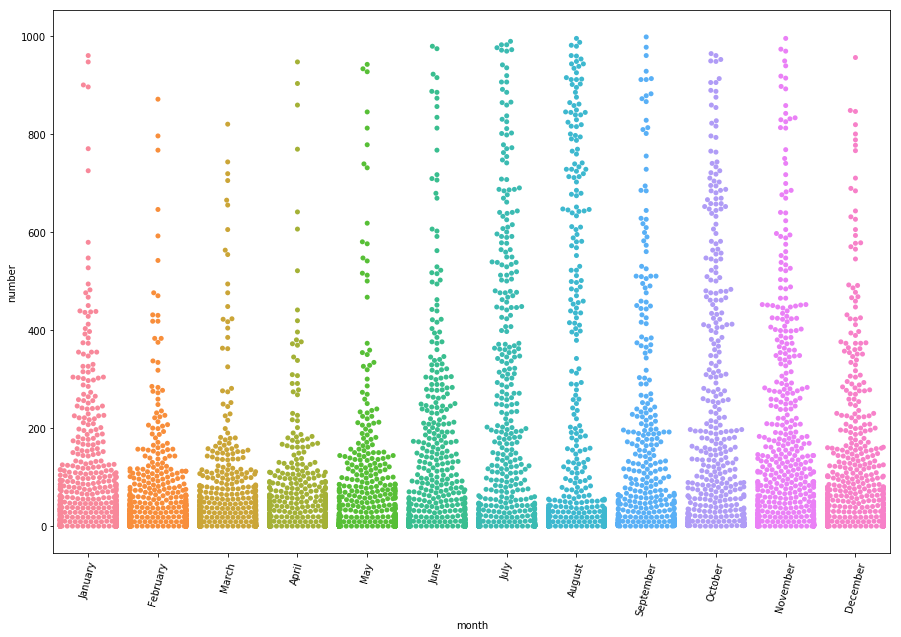

In [30]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="month", y="number",data=df)
plt.xticks(rotation=75)
plt.show()

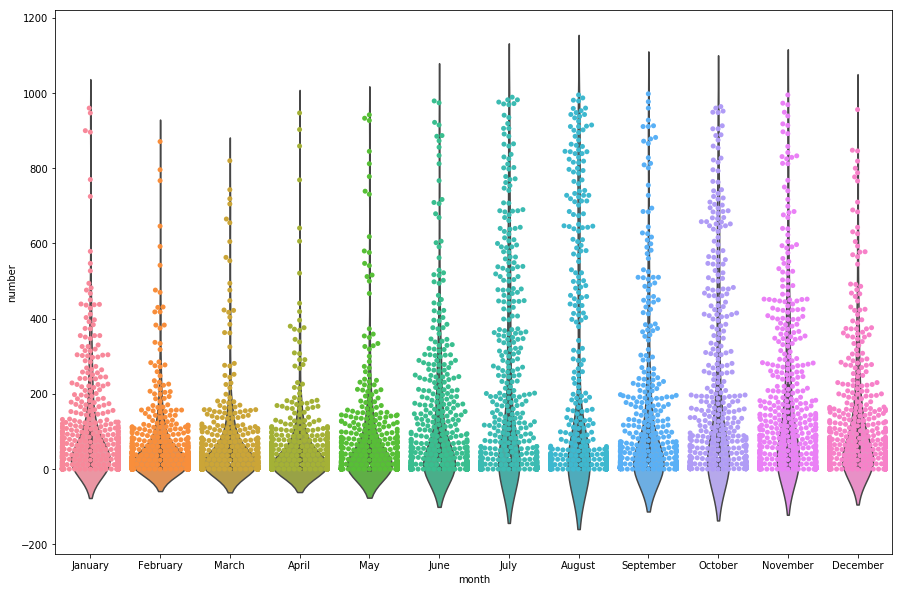

In [39]:
fig=plt.figure(figsize=(15,10))
sns.violinplot(x="month",y="number",data=df)
sns.swarmplot(x="month", y="number",data=df)
plt.show()

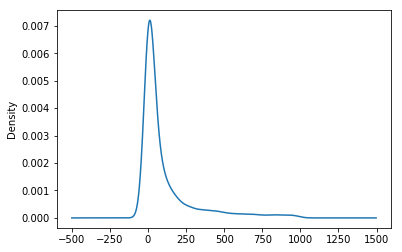

In [34]:
ax=df.number.plot.kde()

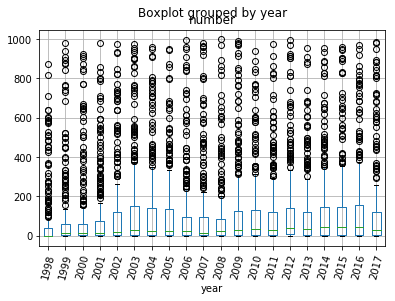

In [35]:
df.boxplot(column="number", by="year")
plt.xticks(rotation=75)
plt.show()

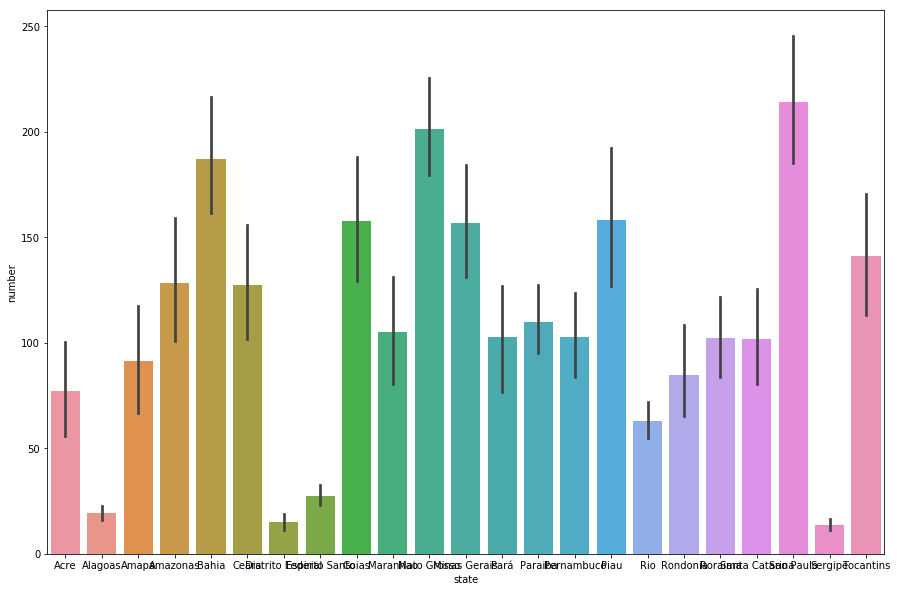

In [38]:
fig=plt.figure(figsize=(15,10))
figure = sns.barplot(x="state",y="number",data=df)
plt.show()

In [13]:
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2017 = df[df.year == 2017].iloc[:100,:]

y_saving = [each for each in df2017.number]
y_net_worth  = [float(each) for each in df2017.number]
x_saving = [each for each in df2017.state]
x_net_worth  = [each for each in df2017.state]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='number',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='state',
)
layout = dict(
                title='number and state',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

In [14]:

df2017 = df[df.year == 2017].iloc[:100,:]
pie1 = df2017.number
labels = df2017.state
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Fires",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"States Number of Fires",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Fires",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

to be continued